In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import sys
sys.path.append('/Users/MYK/Desktop/IRES/scripts')

import numpy as np
import matplotlib.pyplot as plt
import pywt
import utils as u
import fake_profile as fp
import seaborn as sns
import scipy.stats as ss

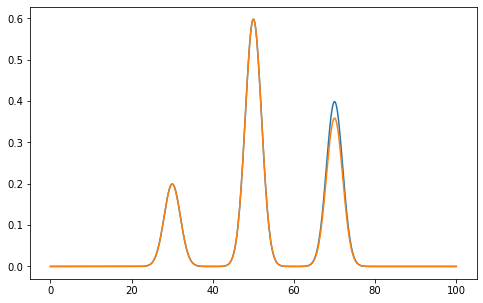

In [19]:
a1 = [1, 3, 2]
a2 = [1, 3, 1.8]
mu1 = [30, 50, 70]
sd1 = [2, 2, 2]

fig = plt.figure(figsize=(8,5))
ref = fp.fake_profile(a1,mu1,sd1); ref.construct_profile()
mode = fp.fake_profile(a2,mu1,sd1); mode.construct_profile()
plt.plot(ref.domain, ref.profile, label='ref')
plt.plot(ref.domain, mode.profile, label='mode')


In [4]:
#create 1000 fakes
sigma = 0.03
fake_ref = np.vstack(tuple([ref.profile + np.random.randn(512)*sigma] for i in range(500)))
fake_mod = np.vstack(tuple([mode.profile + np.random.randn(512)*sigma] for i in range(500)))

In [5]:
ra1,rd1,rd2,rd3,rd4,rd5,rd6,rd7,rd8,rd9 = ([] for i in range(10))
ma1,md1,md2,md3,md4,md5,md6,md7,md8,md9 = ([] for i in range(10))
result_ref = [ra1,rd1,rd2,rd3,rd4,rd5,rd6,rd7,rd8,rd9]
result_mode = [ma1,md1,md2,md3,md4,md5,md6,md7,md8,md9]

for i in range(len(fake_ref)):
    a = pywt.wavedec(fake_ref[i], wavelet='haar')
    for j in range(len(a)):
        result_ref[j] += a[j].tolist()
        
for i in range(len(fake_mod)):
    a = pywt.wavedec(fake_mod[i], wavelet='haar')
    for j in range(len(a)):
        result_mode[j] += a[j].tolist()

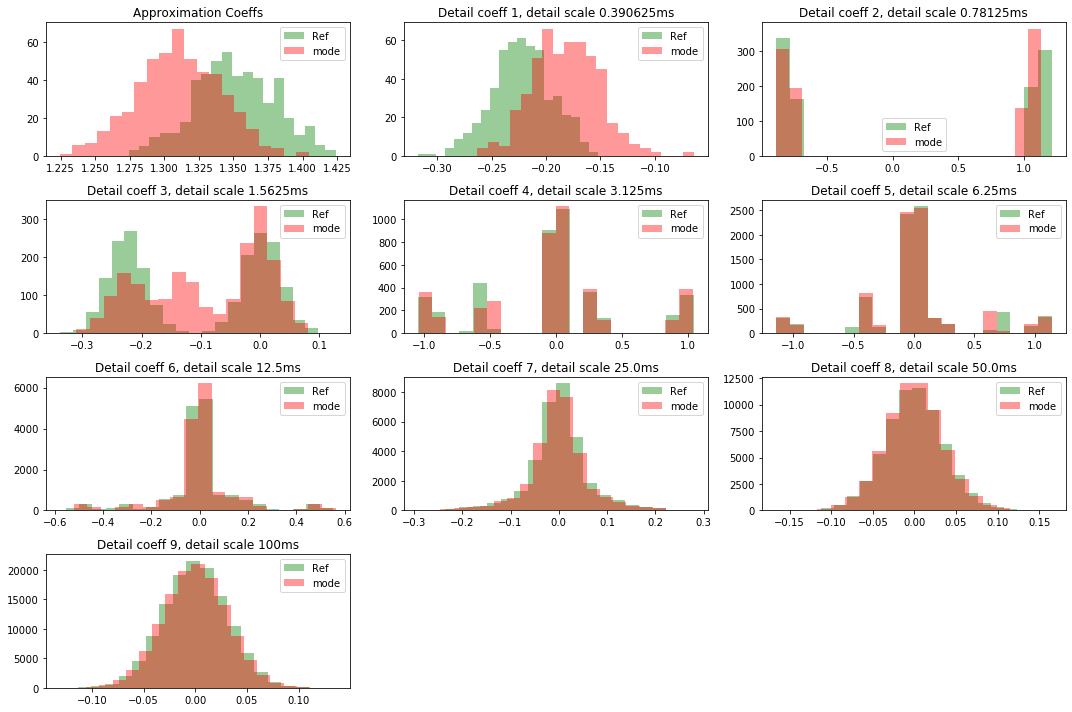

In [14]:
fig = plt.figure(figsize=(15,10))

for i in range(len(result_ref)):
    ax = fig.add_subplot(4,3,i+1)
    ax.hist(result_ref[i], bins=20, label='Ref', color='g', alpha=.4)
    ax.hist(result_mode[i], bins=20, color='r', alpha=.4, label='mode')
    plt.legend()
    if i == 0:
        ax.set_title('Approximation Coeffs')
    else:
        ax.set_title('Detail coeff {}, detail scale {}ms'.format(i, 100*2**(-9+i)))
plt.legend()
plt.tight_layout()
#plt.show()

In [37]:
for i in range(10):
    anova = ss.f_oneway(result_ref[i], result_mode[i])
    if anova.pvalue < .01:
        print('{:>9}ms'.format(100*2**(-9+i)), anova, 'Detected')

0.1953125ms F_onewayResult(statistic=474.88548158389364, pvalue=1.9813742705667752e-86) Detected
 0.390625ms F_onewayResult(statistic=495.9139846716484, pvalue=1.653961079368575e-89) Detected
   1.5625ms F_onewayResult(statistic=38.67779885068429, pvalue=5.511687920137524e-10) Detected
